In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
Dataset=pd.read_csv("merc.csv")
Dataset.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [3]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


In [4]:
Dataset.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [5]:
Dataset.replace(0,np.nan,inplace=True)

In [6]:
Dataset.isnull().sum()

model             0
year              0
price             0
transmission      0
mileage           0
fuelType          0
tax             172
mpg               0
engineSize       12
dtype: int64

In [7]:
Dataset.dropna(axis=0,inplace=True)

In [8]:
Dataset.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

<AxesSubplot:>

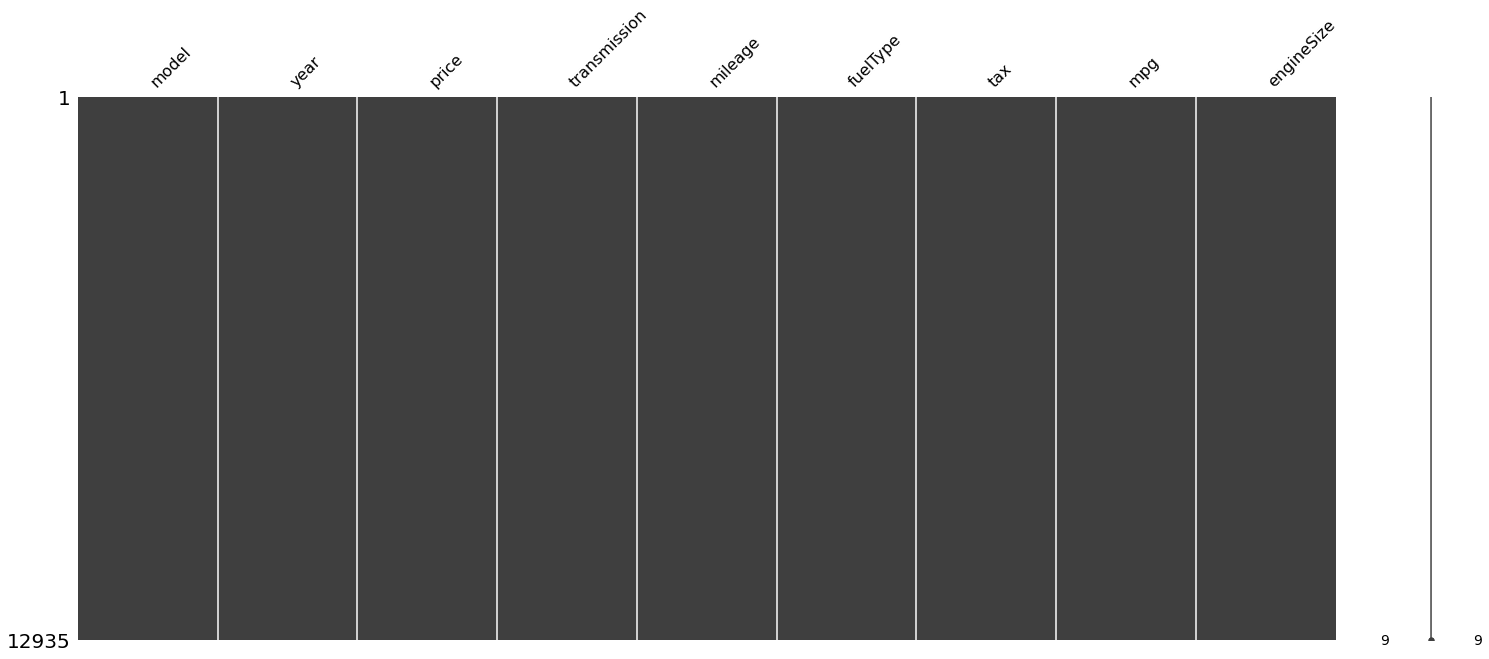

In [9]:
msno.matrix(Dataset)

In [10]:
pd.get_dummies(Dataset["transmission"]),
Trans=pd.get_dummies(Dataset["transmission"],drop_first=True)
FuelT=pd.get_dummies(Dataset["fuelType"],drop_first=True)


In [11]:
Trans.head(1)

,Manual,Other,Semi-Auto
0,0,0,0


In [12]:
FuelT.head(1)

,Hybrid,Other,Petrol
0,0,0,1


In [13]:
Dataset=pd.concat([Dataset,Trans,FuelT],axis=1)
Dataset

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manual,Other,Semi-Auto,Hybrid,Other,Petrol
0,SLK,2005,5200,Automatic,63000,Petrol,325.0,32.1,1.8,0,0,0,0,0,1
1,S Class,2017,34948,Automatic,27000,Hybrid,20.0,61.4,2.1,0,0,0,1,0,0
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555.0,28.0,5.5,0,0,0,0,0,1
3,G Class,2016,61948,Automatic,16000,Petrol,325.0,30.4,4.0,0,0,0,0,0,1
4,G Class,2016,73948,Automatic,4000,Petrol,325.0,30.1,4.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,145.0,55.4,2.0,0,0,0,0,0,0
13115,B Class,2020,24699,Automatic,2500,Diesel,145.0,55.4,2.0,0,0,0,0,0,0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145.0,41.5,2.1,0,0,0,0,0,0
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145.0,45.6,2.0,0,0,0,0,0,0


In [14]:
Dataset.drop(["transmission","fuelType","model","year"],axis=1,inplace=True)

In [15]:
Dataset

,price,mileage,tax,mpg,engineSize,Manual,Other,Semi-Auto,Hybrid,Other,Petrol
0,5200,63000,325.0,32.1,1.8,0,0,0,0,0,1
1,34948,27000,20.0,61.4,2.1,0,0,0,1,0,0
2,49948,6200,555.0,28.0,5.5,0,0,0,0,0,1
3,61948,16000,325.0,30.4,4.0,0,0,0,0,0,1
4,73948,4000,325.0,30.1,4.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
13114,35999,500,145.0,55.4,2.0,0,0,0,0,0,0
13115,24699,2500,145.0,55.4,2.0,0,0,0,0,0,0
13116,30999,11612,145.0,41.5,2.1,0,0,0,0,0,0
13117,37990,2426,145.0,45.6,2.0,0,0,0,0,0,0


In [16]:
#MACHINE LEARNING
#MULTIPLE LINEAR REGRESSION

In [17]:
#Importing the dataset into x and y axis
y=Dataset.iloc[:, 1:2]
x=Dataset.iloc[:, 2:]

In [18]:
#Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
#Fitting multiple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred=regressor.predict(x_test)
y_pred

array([[ 7655.54491866],
       [22343.44044164],
       [14329.35342453],
       ...,
       [17162.61651139],
       [10269.92593918],
       [ 5452.35282194]])

In [24]:
x_test.tail(3)

,tax,mpg,engineSize,Manual,Other,Semi-Auto,Hybrid,Other,Petrol
9124,145.0,51.4,2.0,0,0,1,0,0,0
7924,125.0,52.3,1.6,0,0,1,0,0,1
4204,145.0,35.8,1.6,0,0,1,0,0,1


In [22]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12935 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tax         12935 non-null  float64
 1   mpg         12935 non-null  float64
 2   engineSize  12935 non-null  float64
 3   Manual      12935 non-null  uint8  
 4   Other       12935 non-null  uint8  
 5   Semi-Auto   12935 non-null  uint8  
 6   Hybrid      12935 non-null  uint8  
 7   Other       12935 non-null  uint8  
 8   Petrol      12935 non-null  uint8  
dtypes: float64(3), uint8(6)
memory usage: 480.0 KB


In [25]:
#Building Optimal Model Using Backward Elimination

import statsmodels.api as sm
x=np.append(arr=np.ones((12935, 1)).astype(int), values=x, axis=1)
x_opt=x[:, [0,1,2,3,4,5,6,7,8,9]]
regressor_OLS=sm.OLS(endog=y, exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mileage   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     250.3
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        08:44:02   Log-Likelihood:            -1.4613e+05
No. Observations:               12935   AIC:                         2.923e+05
Df Residuals:                   12926   BIC:                         2.923e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4271.0248    742.276     -5.754      0.000   -5725.996   -2816.054
x1         -4271.0248    742.276     -5.754      0.000   -5725.996   -2816.054
x2           -18.7729      3.240     -5.793      0.000     -25.124     -12.421
x3           380.7666     16.496     23.083      0.000     348.432     413.101
x4          7582.6315    336.754     22.517      0.000    6922.545    8242.718
x5          6685.7636    615.550     10.861      0.000    5479.194    7892.333
x6          1.292e+04   1.95e+04      0.662      0.508   -2.53e+04    5.12e+04
x7         -8422.8820    370.382    -22.741      0.000   -9148.886   -7696.878
x8         -3.445e+04   2784.615    -12.373      0.000   -3.99e+04    -2.9e+04
x9         -8.643e+04   1.97e+04     -4.390      0.000   -1.25e+05   -4.78e+04
==============================================================================
Omnibus:                     5946.989   Durbin-Watson:                   1.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47280.066
Skew:                           2.041   Prob(JB):                         0.00
Kurtosis:                      11.430   Cond. No.                     1.52e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.32e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [27]:
x_opt=x[:, [0,1,2,3,4,5,7,8,9]]
regressor_OLS=sm.OLS(endog=y, exog=x_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                mileage   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     286.0
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        08:45:46   Log-Likelihood:            -1.4613e+05
No. Observations:               12935   AIC:                         2.923e+05
Df Residuals:                   12927   BIC:                         2.923e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4270.9228    742.260     -5.754      0.000   -5725.862   -2815.983
x1         -4270.9228    742.260     -5.754      0.000   -5725.862   -2815.983
x2           -18.7662      3.240     -5.792      0.000     -25.118     -12.415
x3           380.8026     16.495     23.085      0.000     348.469     413.136
x4          7582.4867    336.746     22.517      0.000    6922.414    8242.559
x5          6683.0593    615.523     10.858      0.000    5476.543    7889.576
x6         -8425.6154    370.351    -22.750      0.000   -9151.559   -7699.672
x7         -3.446e+04   2784.547    -12.375      0.000   -3.99e+04    -2.9e+04
x8         -8.644e+04   1.97e+04     -4.390      0.000   -1.25e+05   -4.78e+04
==============================================================================
Omnibus:                     5946.034   Durbin-Watson:                   1.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47262.070
Skew:                           2.041   Prob(JB):                         0.00
Kurtosis:                      11.428   Cond. No.                     5.43e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.04e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""